<a href="https://www.kaggle.com/mohamedabdelwahabali/heart-disease?scriptVersionId=90302304" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv
/kaggle/input/food-composition/Food Composition.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# *Personal Key Indicators of Heart Disease*
[data source](http://www.kaggle.com/kamilpytlak/personal-key-indicators-of-heart-disease)

In [3]:
heart_csv = '/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv'
heart = pd.read_csv(heart_csv)
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
heart_cat = heart.select_dtypes('object')
heart_num = heart.select_dtypes('float64')
heart_cat.info(), heart_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   HeartDisease      319795 non-null  object
 1   Smoking           319795 non-null  object
 2   AlcoholDrinking   319795 non-null  object
 3   Stroke            319795 non-null  object
 4   DiffWalking       319795 non-null  object
 5   Sex               319795 non-null  object
 6   AgeCategory       319795 non-null  object
 7   Race              319795 non-null  object
 8   Diabetic          319795 non-null  object
 9   PhysicalActivity  319795 non-null  object
 10  GenHealth         319795 non-null  object
 11  Asthma            319795 non-null  object
 12  KidneyDisease     319795 non-null  object
 13  SkinCancer        319795 non-null  object
dtypes: object(14)
memory usage: 34.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (tot

(None, None)

array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'PhysicalHealth'}>],
       [<AxesSubplot:title={'center':'MentalHealth'}>,
        <AxesSubplot:title={'center':'SleepTime'}>]], dtype=object)

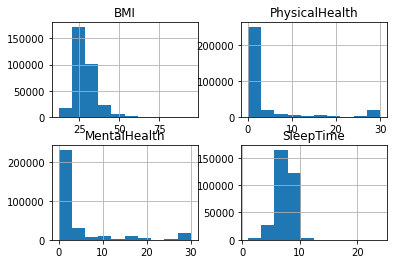

In [5]:
heart_num.hist()

In [6]:
#[heart_cat[col].value_counts() for col in list(heart_cat.columns)]
# creat list contain column names the cat yes - no
heart_cat_yes_no = []
for col in list(heart_cat.columns):
    if len(heart_cat[col].value_counts().tolist()) == 2:
        heart_cat_yes_no.append(col)

heart_cat_yes_no

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [7]:
heart[heart_cat_yes_no] = heart[heart_cat_yes_no].apply(lambda x:x.map({'Yes':1,'No':0, 'Male':1, 'Female': 0}))

In [8]:
heart['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [9]:
heart[['Diabetic']] = heart[['Diabetic']].apply(lambda x:x.map({'Yes':1,'No':0, 'Yes (during pregnancy)':1, 'No, borderline diabetes': 0}))

<AxesSubplot:>

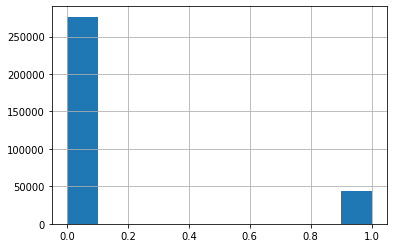

In [10]:
heart['Diabetic'].hist()

In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [12]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [13]:
heart_cat = heart.select_dtypes('object')
heart_num = heart.select_dtypes(['float64','int64'])
heart_cat.info(), heart_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   AgeCategory  319795 non-null  object
 1   Race         319795 non-null  object
 2   GenHealth    319795 non-null  object
dtypes: object(3)
memory usage: 7.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 

(None, None)

In [14]:
heart_cat['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [15]:
corr_matrix = heart_num.corr()
corr_matrix['HeartDisease'].sort_values(ascending=False)

HeartDisease        1.000000
DiffWalking         0.201258
Stroke              0.196835
Diabetic            0.174782
PhysicalHealth      0.170721
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
MentalHealth        0.028591
SleepTime           0.008327
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64

In [16]:
heart_num = heart.select_dtypes(include=[np.number])
heart_cat = heart.select_dtypes('object')

num_attribs = list(heart_num)
cat_attribs = list(heart_cat)

In [17]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

heart_prepared = full_pipeline.fit_transform(heart)

In [18]:
heart_prepared.shape

(319795, 39)